In [2]:
import pandas as pd 
import matplotlib.pyplot as plt #Visualizatio
import seaborn as sns #Visualization
from pathlib import Path 

In [204]:
#creating a data path 
root = Path.cwd().parent 
data_path = root / "data" / "diabetes.csv"

#loading the data into the data frame 
df = pd.read_csv(data_path)


In [205]:
# EDA 
#top 7 rows 
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [206]:
#bottom 7
df.tail(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [207]:
#checking the data types present in dataset 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [208]:
#renaming the columns to improve readability 
#DPF = a score that quantifies the risk of developing diabetes based on a person's family history and age. 
df = df.rename(columns={"BloodPressure":"BP","DiabetesPedigreeFunction":"DPF"})

In [209]:
#looking at the changed rows & looking at the amount of rows 
df.count()

Pregnancies      768
Glucose          768
BP               768
SkinThickness    768
Insulin          768
BMI              768
DPF              768
Age              768
Outcome          768
dtype: int64

In [210]:
# getting the shape of the dataset to help get rid of duplictes 
df.shape

(768, 9)

In [211]:
duplicated = df[df.duplicated()]
print("The number of duplictaed rows: ", duplicated.shape)

The number of duplictaed rows:  (0, 9)


In [213]:
#finding null values 
print(df.isnull().sum())

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


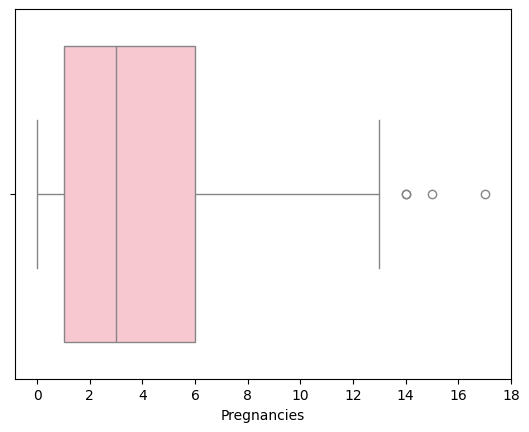

In [214]:
# getting outliers visualzied for each column 

sns.boxplot(x=df['Pregnancies'], color='pink')

#getting better plotting 
plt.xticks(range(0,19,2))

plt.show()

In [215]:
print(df['Glucose'].min())

0


<Axes: xlabel='Glucose'>

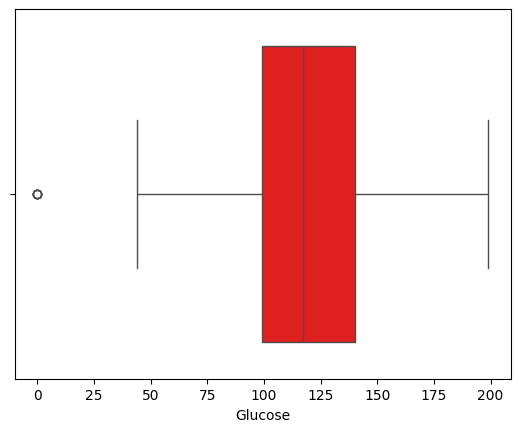

In [216]:
sns.boxplot(x=df['Glucose'],color = 'red')

<Axes: xlabel='BP'>

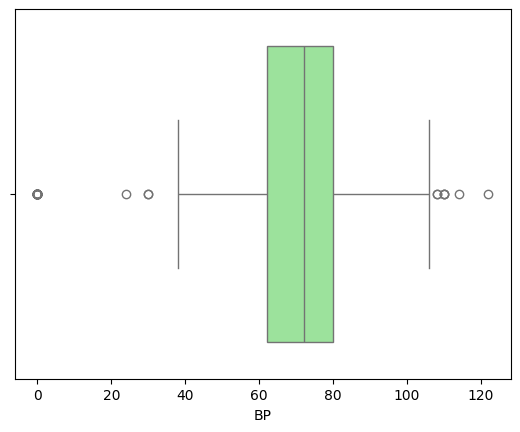

In [217]:
sns.boxplot(x=df['BP'], color = 'lightgreen')

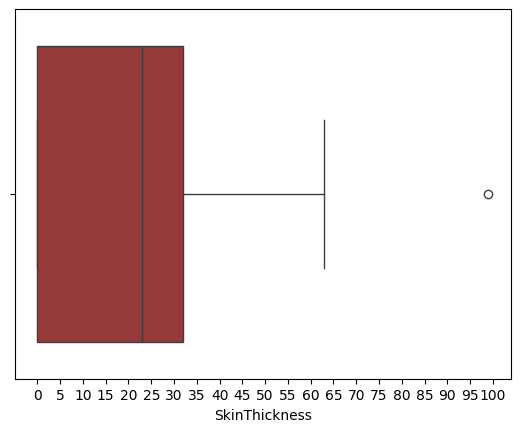

In [218]:
sns.boxplot(x=df['SkinThickness'], color = 'brown')
plt.xticks(range(0,101,5))
plt.show()

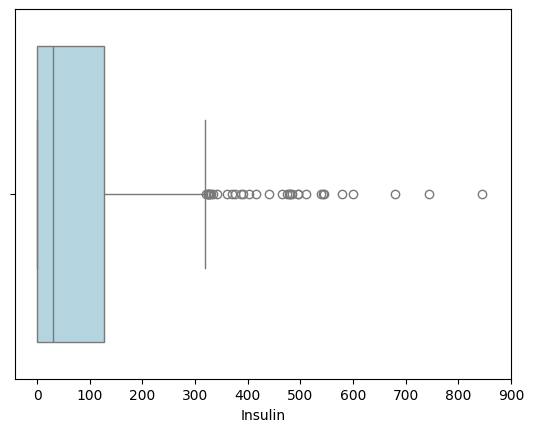

In [219]:
#read online that Insulin can be 0 in special cases
sns.boxplot(x=df['Insulin'], color = 'lightblue')
plt.xticks(range(0,901,100))
plt.show()

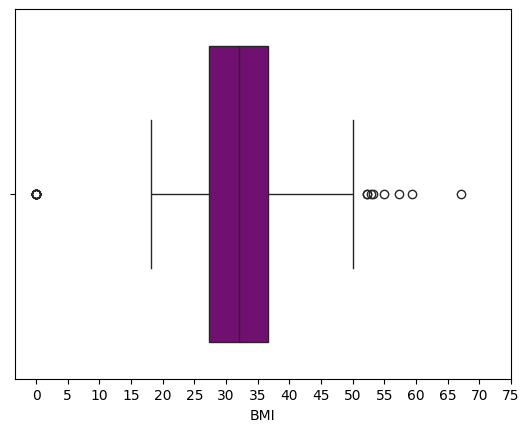

In [220]:
sns.boxplot(x=df['BMI'], color = 'purple')
plt.xticks(range(0,80,5))
plt.show()

<Axes: xlabel='DPF'>

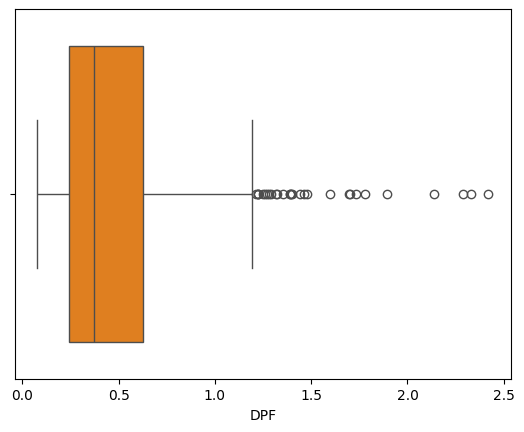

In [221]:
sns.boxplot(x=df['DPF'], color = '#FF7F00')

<Axes: xlabel='Age'>

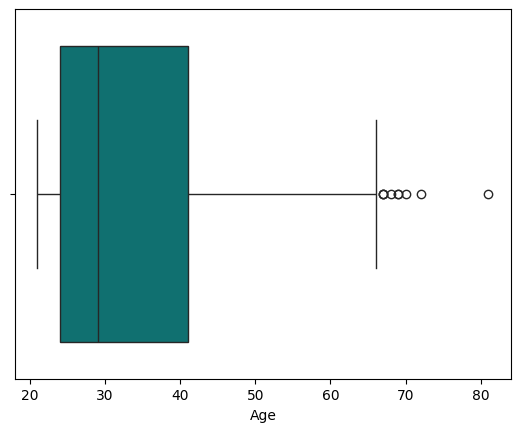

In [222]:
sns.boxplot(x=df['Age'], color = 'teal')

<Axes: >

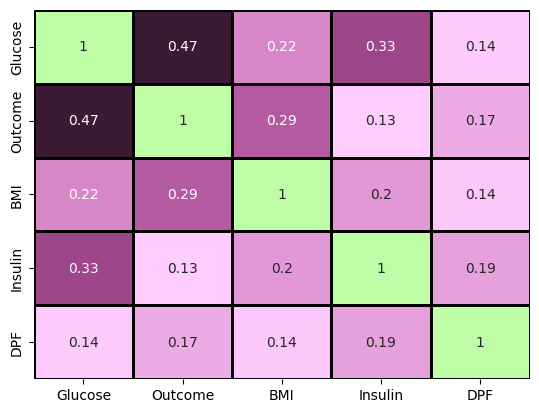

In [223]:
correlation = df[['Glucose','Outcome', 'BMI','Insulin','DPF']].corr()
sns.heatmap(correlation,
            annot=True, 
            cmap="vanimo",
            cbar=False,
            linewidths=2,
            linecolor= 'black'
            )

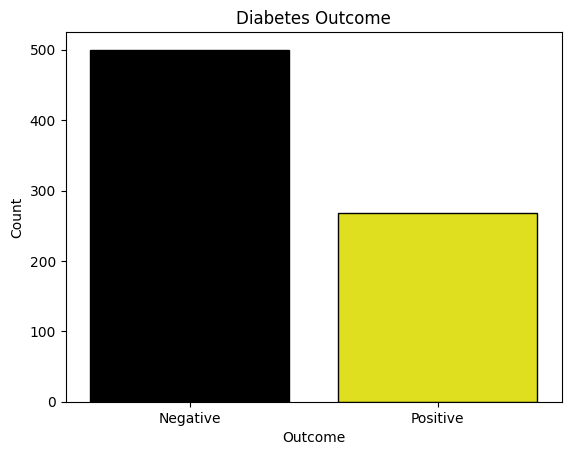

In [224]:
sns.countplot(x=df['Outcome'],hue=df['Outcome'],palette=['black','yellow'],edgecolor='black',legend=False)
plt.title("Diabetes Outcome")
plt.xticks([0,1],['Negative','Positive'])
plt.ylabel("Count")
plt.show()